In [1]:
import sympy as sym
from sympy import Symbol, exp, series, limit, init_printing, sqrt
init_printing()
eps=Symbol('varepsilon')

1) Полагая $f \sim a_1\varepsilon^\alpha + a_2\varepsilon^\beta$ найти $\alpha$, $\beta$ и ненулевые коэффициенты $a_1$, $a_2$:
$f = (1 + \varepsilon{x})^{1/\varepsilon}$ для 0 < x < $\infty$. Так как x любой примем x = 1

In [2]:
x = Symbol('x')
f = (1 + eps)**(1/eps)
f

In [3]:
limit(f,eps,0,'+')

In [4]:
Nexpand=9 # Порядок разложения
cflst=[eps**i for i in range(0,Nexpand-1)] # Список калибровочных функций
a=[limit(f/cflst[0],eps,0,'+')]  # Первый член разложения
cflst,a

In [5]:
for i in range(1,Nexpand-1):
    psum=sum([a[j]*cflst[j] for j in range(i)])
    a.append(limit((f-psum)/cflst[i],eps,0,'+'))
sum([a[j]*cflst[j] for j in range(Nexpand-1)])    

In [6]:
# Проверка с помощью функции series
series(f,eps,0,8,'+').removeO()

2) Найти асимптотические разложения вида $x \sim a_1\varepsilon^\alpha + a_2\varepsilon^\beta + ...$ всех
корней следующих регулярно возмущенных уравнений
a) $ x^2 - (3+\varepsilon)x + 1 + \varepsilon = 0$

In [7]:
from sympy import symbols, Function, diff, collect, solve
Nexpand=9
x=symbols(f'x0:{Nexpand+2}')#Function('x')(eps)
X=Symbol('X')
eq1=X**2 - (3 + eps)*X + 1 + eps # Исходное уравнение
eq1

In [8]:
Subsseries=sum(x[i]*eps**i for i in range(Nexpand))# разложение корня в виде ряда по epsilon
# Подстановка ряда в уравнение и группировка по epsilon
Res=series(collect(eq1.subs(X,Subsseries).expand(),eps),eps,0,Nexpand).removeO() 
Res

In [9]:
# Находим корни невозмущённого уравнения
roots0=solve(Res.coeff(eps,0))
roots0

In [10]:
# Находим коэффициенты разложения первого корня
root1={x[0]:roots0[0]} 
Sys1=[Res.coeff(eps,i).subs(root1) for i in range(Nexpand)]
for i in range(1,Nexpand):
    root1[x[i]] = solve(Sys1[i].subs(root1), x[i])[0]
Subsseries.subs(root1)

In [11]:
# Находим коэффициенты разложения второго корня
root2={x[0]:roots0[1]} 
Sys2=[Res.coeff(eps,i).subs(root2) for i in range(Nexpand)]
for i in range(1,Nexpand):
    root2[x[i]] = solve(Sys2[i].subs(root2), x[i])[0]
Subsseries.subs(root2)

In [12]:
# Разложение точного решения
Sol=solve(eq1,X)
Solseries=[series(sol,eps,0,Nexpand).removeO() for sol in Sol]
Solseries

3) Найти асимптотические разложения вида $x \sim a_1\varepsilon^\alpha + a_2\varepsilon^\beta + ...$ всех
корней следующих сингулярно возмущенных уравнений
a) $ \varepsilon{x^3} - 3x + 1 = 0$

Если построить многоугольник Ньютона(см. Задание 1)

Первому ребру соответствует многочлен $-3X+1$, тогда начальное приближение корня есть $X_0=\frac{1}{3}$

Второму ребру соответствует многочлен $\varepsilon{X^3}-3X$, тогда начальное приближение корня есть $X_0=\pm\sqrt{\frac{3}{\varepsilon}}$

In [13]:
Nexpand=9
eq2=eps*X**3-3*X+1 # Исходное уравнение
eq2

In [14]:
Subsseries1=sum(x[i]*eps**(i) for i in range(Nexpand))# разложение корня в виде ряда по epsilon
# Подстановка ряда в уравнение и группировка по epsilon
Res1=series(collect(eq2.subs(X,Subsseries1).expand(),eps),eps,0,Nexpand).removeO() 
Subsseries1

In [15]:
# Находим коэффициенты разложения первого корня
root1={x[0]:1/3} 
Sys1=[Res1.coeff(eps,i).subs(root1) for i in range(Nexpand)]
root1.update(solve(Sys1)[0])
Subsseries1.subs(root1)

In [16]:
# Находим второй корень начиная от sqrt (3/epsilon)
Subsseries2= sqrt(3)*eps**(-1/2) + sum(x[i]*eps**(i-1) for i in range(1,Nexpand))# разложение корня в виде ряда по epsilon
# Подстановка ряда в уравнение и группировка по epsilon
Res2=series(collect(eq2.subs(X,Subsseries2).expand(),eps),eps,0,Nexpand).removeO() 
Res2

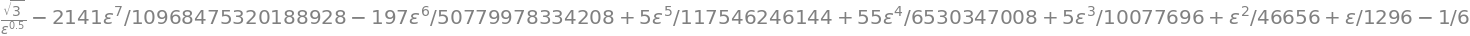

In [17]:
# Находим коэффициенты разложения второго корня
root2=dict() 
Sys2=[Res2.coeff(eps,i) for i in range(Nexpand-1)]
root2.update(solve(Sys2)[0])
Subsseries2.subs(root2)

In [18]:
# Находим третий корень начиная от - sqrt (3/epsilon)
Subsseries3=-sqrt(3)*eps**(-1/2) + sum(x[i]*eps**(i-1) for i in range(1,Nexpand))# разложение корня в виде ряда по epsilon
# Подстановка ряда в уравнение и группировка по epsilon
Res3=series(collect(eq2.subs(X,Subsseries3).expand(),eps),eps,0,Nexpand).removeO() 
Res3

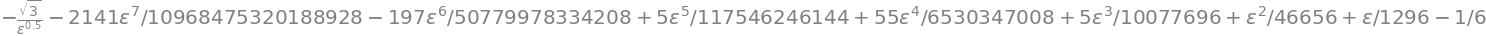

In [20]:
# Находим коэффициенты разложения третьего корня
root3=dict() 
Sys3=[Res3.coeff(eps,i) for i in range(Nexpand-1)]
root3.update(solve(Sys3)[0])
Subsseries3.subs(root3)